# HR Attrition Analytics & ML-Based Risk Prediction


## 📌 Problem Statement

Employee attrition is a critical challenge for organizations, leading to increased hiring costs, loss of expertise, and reduced productivity.  
The objective of this project is to analyze historical HR data to identify attrition patterns, understand key drivers behind employee exits, and proactively predict employees who are at high risk of leaving the organization.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('hr_clean.csv')

df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,AttritionFlag,OverTimeFlag,SalaryBand
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,8,0,1,6,4,0,5,1,1,Medium
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,10,3,3,10,7,1,7,0,0,Medium
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,7,3,3,0,0,0,0,1,1,Low
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,8,3,3,8,7,3,0,0,1,Low
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,6,3,3,2,2,2,2,0,0,Medium


In [7]:
df.shape

(1470, 38)

In [8]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'AttritionFlag', 'OverTimeFlag', 'SalaryBand'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 38 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [10]:
df['Attrition'].value_counts()
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [11]:
df['Attrition'].value_counts(normalize=True) * 100


Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

In [12]:
dept_attrition = df[df['Attrition'] == 'Yes'].groupby('Department').size()

dept_attrition


Department
Human Resources            12
Research & Development    133
Sales                      92
dtype: int64

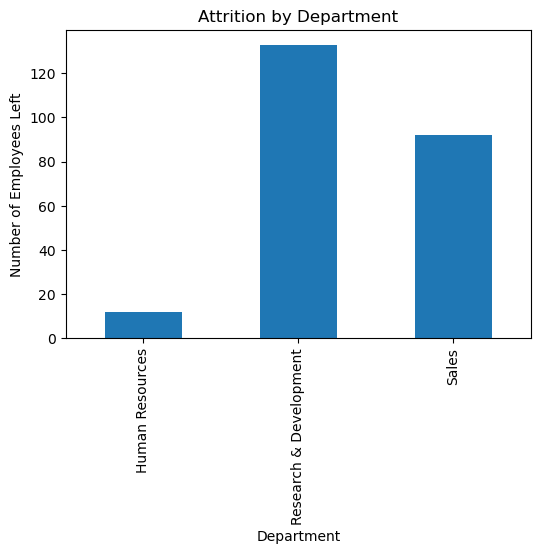

In [13]:
plt.figure(figsize=(6,4))
dept_attrition.plot(kind='bar')
plt.title('Attrition by Department')
plt.xlabel('Department')
plt.ylabel('Number of Employees Left')
plt.show()


In [14]:
overtime_attrition = df[df['Attrition'] == 'Yes']['OverTime'].value_counts()

overtime_attrition


OverTime
Yes    127
No     110
Name: count, dtype: int64

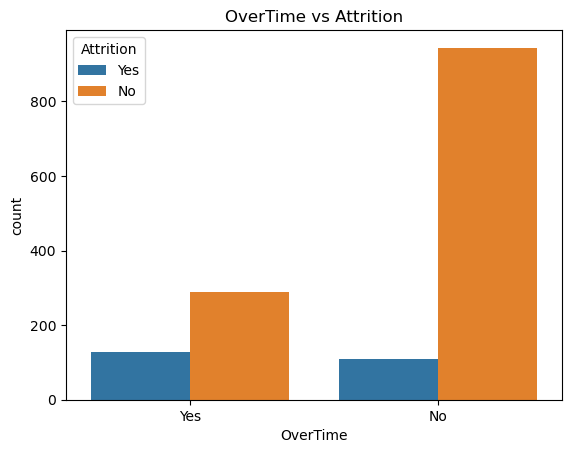

In [15]:
sns.countplot(data=df, x='OverTime', hue='Attrition')
plt.title('OverTime vs Attrition')
plt.show()


In [16]:
salary_attrition = df[df['Attrition'] == 'Yes']['SalaryBand'].value_counts()

salary_attrition


SalaryBand
Low       113
Medium     77
High       47
Name: count, dtype: int64

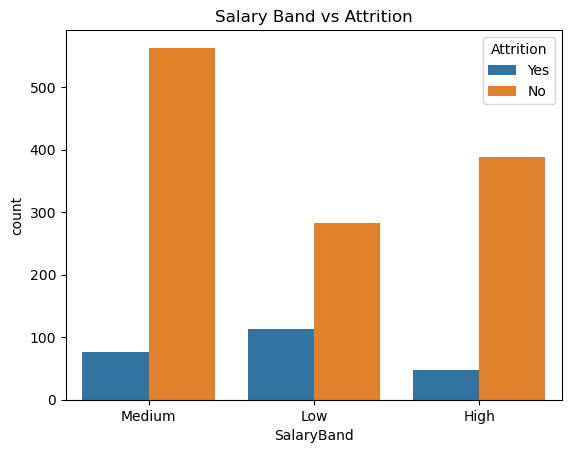

In [17]:
sns.countplot(data=df, x='SalaryBand', hue='Attrition')
plt.title('Salary Band vs Attrition')
plt.show()


In [18]:
df.groupby('Attrition')['YearsAtCompany'].mean()


Attrition
No     7.369019
Yes    5.130802
Name: YearsAtCompany, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [20]:
y = df['AttritionFlag']


In [21]:
X = df[
    [
        'Age',
        'MonthlyIncome',
        'YearsAtCompany',
        'TotalWorkingYears',
        'WorkLifeBalance',
        'JobSatisfaction',
        'EnvironmentSatisfaction',
        'OverTimeFlag'
    ]
]


In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)


In [23]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy_score(y_test, y_pred)

0.8695652173913043

In [26]:
confusion_matrix(y_test, y_pred)


array([[316,   4],
       [ 44,   4]])

In [27]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.99      0.93       320
           1       0.50      0.08      0.14        48

    accuracy                           0.87       368
   macro avg       0.69      0.54      0.54       368
weighted avg       0.83      0.87      0.83       368



In [28]:
df['AttritionRiskScore'] = model.predict_proba(X)[:, 1]

In [29]:
df['AttritionRiskScore'].min(), df['AttritionRiskScore'].max()


(0.00295780395334549, 0.7400751339258202)

In [30]:
def risk_category(score):
    if score >= 0.7:
        return 'High Risk'
    elif score >= 0.4:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df['RiskCategory'] = df['AttritionRiskScore'].apply(risk_category)


In [31]:

df['RiskCategory'].value_counts()


RiskCategory
Low Risk       1348
Medium Risk     113
High Risk         9
Name: count, dtype: int64

In [32]:
df['RiskCategory'] = pd.cut(
    df['AttritionRiskScore'],
    bins=[0, 0.33, 0.66, 1],
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)


In [34]:
df.to_csv('hr_risk_scored.csv', index=False)


# BUSINESS INTERPRETATION

#### *High-risk employees show higher overtime and lower work-life balance
#### *Model helps HR proactively plan retention strategies
#### *Risk scoring is more useful than binary attrition prediction